# Problema de los interruptores y las bombillas <a class="anchor" id="inicio"></a>

Proyecto final - lógica para ciencias de la computación

1. Joseph Doqueresana
2. Ivan Moreno

## Situación a representar <a class="anchor" id="prob"></a>

En una habitación hay tres interruptores y tres bombillas, pero no
está claro cuál interruptor controla cada bombilla. Solo puedes
ingresar a la habitación una vez. El objetivo es determinar qué
interruptor está asociado con qué bombilla utilizando la
información observada después de una sola visita a la habitación

Información disponible:

1. Interruptores: Hay tres interruptores en la habitación, numerados del 1 al 3.
2. Bombillas: También hay tres bombillas, numeradas del 1 al 3.
3. Estado inicial: Al comienzo, todos los interruptores y bombillas están apagados.
4. Acciones permitidas: Solo puedes realizar dos acciones:

        a. Encender uno de los interruptores.
        b. Ingresar a la habitación.

Restricciones:

1. Una sola visita: Solo se permite ingresar a la habitación una vez.
2. Unicidad de la iluminación: Cuando se enciende un interruptor, solo una bombilla se enciende y las otras dos permanecen apagadas.
3. Observación de resultados: Después de encender un interruptor y entrar en la habitación, solo puedes observar el estado de las bombillas.

Con estas restricciones, aseguramos que cada acción tenga un efecto único y claro en el estado de las bombillas, lo que nos permite deducir correctamente la asociación entre los interruptores
y las bombillas.

## Estrategia de resolución <a class="anchor" id="prob"></a>

1. Enciende uno de los interruptores y deja que las bombillas permanezcan encendidas durante un tiempo corto.
2. Apaga el interruptor previamente encendido y enciende otro interruptor.
3. Ingresa a la habitación y observa el estado de las bombillas.
4. Utiliza las observaciones para deducir qué interruptor controla cada bombilla.

Encendemos el interruptor 1 y dejamos las bombillas encendidas brevemente.
Luego, apagamos el interruptor 1 y encendemos el interruptor 2. Al entrar en
la habitación, si identificamos la bombilla como encendida estará relacionada
con el interruptor 2,si la bombilla esta apagada pero caliente con el interruptor
1 y si la bombilla esta apagada y fría con el interruptor 3.
Esta estrategia nos permite determinar qué interruptor controla cada bombilla
con una sola visita.

# Implementación de restricciones <a class="anchor" id="imp"></a>

Vamos a representar las posibles combinaciones de estados de las bombillas y los interruptores con proposiciones lógicas. Utilizaremos letras para representar cada elemento y asignaremos valores lógicos para indicar si están encendidos o apagados.


In [1]:
from problema import Bombillas # importa ña solucion (reglas del problema)
from paquete_logico import * # paquete de formulas logicas

In [2]:
problemaa = Bombillas() #instanciar el problema

In [3]:
problemaa.regla #todas las relgas del problema (codificadas)

['(((((((((ĉ=(((ĀYĒ)O(ăYĕ))O(ĆYĘ)))Y(Č=(((ĀYē)O(ăYĖ))O(ĆYę))))Y(ď=(((ĀYĔ)O(ăYė))O(ĆYĚ))))Y(Ċ=(((āYĒ)O(ĄYĕ))O(ćYĘ))))Y(č=(((āYē)O(ĄYĖ))O(ćYę))))Y(Đ=(((āYĔ)O(ĄYė))O(ćYĚ))))Y(ċ=(((ĂYĒ)O(ąYĕ))O(ĈYĘ))))Y(Ď=(((ĂYē)O(ąYĖ))O(ĈYę))))Y(đ=(((ĂYĔ)O(ąYė))O(ĈYĚ))))',
 '((((ĉOČ)Oď)Y((ĊOč)OĐ))Y((ċOĎ)Ođ))',
 '((((ĉOĊ)Oċ)Y((ČOč)OĎ))Y((ďOĐ)Ođ))',
 '(((((((((ĉ>-(ČOď))Y(Č>-(ĉOď)))Y(ď>-(ĉOČ)))Y(Ċ>-(čOĐ)))Y(č>-(ĊOĐ)))Y(Đ>-(ĊOč)))Y(ċ>-(ĎOđ)))Y(Ď>-(ċOđ)))Y(đ>-(ċOĎ)))',
 '(((((((((ĉ>-(ĊOċ))Y(Ċ>-(ĉOċ)))Y(ċ>-(ĉOĊ)))Y(Č>-(čOĎ)))Y(č>-(ČOĎ)))Y(Ď>-(ČOč)))Y(ď>-(ĐOđ)))Y(Đ>-(ďOđ)))Y(đ>-(ďOĐ)))']

Si una bombilla está encendida, su interruptor también debe estar encendido

$$\bigwedge_{b,i} \left( Pertenece(b,i) \iff \left( \bigvee_e \left( Bombilla(b,e) \wedge Interruptor(i,e) \right) \right) \right)$$

In [4]:
problemaa.escribirFormula(problemaa.regla[0]) # regla 1 como (decodificada)

'(((((((((El Interruptor 1 pertenece a bombillo 1 sii (((El bomillo 1 está Encendido Y El interruptor 1 está Encendido) O (El bomillo 1 está Apagado Y El interruptor 1 está Apagado)) O (El bomillo 1 está Caliente Y El interruptor 1 está Encendido y luego apagado))) Y (El Interruptor 2 pertenece a bombillo 1 sii (((El bomillo 1 está Encendido Y El interruptor 2 está Encendido) O (El bomillo 1 está Apagado Y El interruptor 2 está Apagado)) O (El bomillo 1 está Caliente Y El interruptor 2 está Encendido y luego apagado)))) Y (El Interruptor 3 pertenece a bombillo 1 sii (((El bomillo 1 está Encendido Y El interruptor 3 está Encendido) O (El bomillo 1 está Apagado Y El interruptor 3 está Apagado)) O (El bomillo 1 está Caliente Y El interruptor 3 está Encendido y luego apagado)))) Y (El Interruptor 1 pertenece a bombillo 2 sii (((El bomillo 2 está Encendido Y El interruptor 1 está Encendido) O (El bomillo 2 está Apagado Y El interruptor 1 está Apagado)) O (El bomillo 2 está Caliente Y El int

todo bombillo le pertenece algún interruptor

$$ \bigwedge_{b} \left( \text{Estado}(b) \iff \left( \bigvee_i \text{Pertenece}(b,i) \wedge \text{Estado}(i) \right) \right)$$

In [5]:
problemaa.escribirFormula(problemaa.regla[1]) # regla 2 como (decodificada)

'((((El Interruptor 1 pertenece a bombillo 1 O El Interruptor 2 pertenece a bombillo 1) O El Interruptor 3 pertenece a bombillo 1) Y ((El Interruptor 1 pertenece a bombillo 2 O El Interruptor 2 pertenece a bombillo 2) O El Interruptor 3 pertenece a bombillo 2)) Y ((El Interruptor 1 pertenece a bombillo 3 O El Interruptor 2 pertenece a bombillo 3) O El Interruptor 3 pertenece a bombillo 3))'

Todo interruptor pertenece a algún bombillo

$$ \bigwedge_{i} \left( \text{Estado}(i) \iff \left( \bigvee_b \text{Pertenece}(b,i) \wedge \text{Estado}(b) \right) \right)$$

In [6]:
problemaa.escribirFormula(problemaa.regla[2]) # regla 3 como (decodificada)

'((((El Interruptor 1 pertenece a bombillo 1 O El Interruptor 1 pertenece a bombillo 2) O El Interruptor 1 pertenece a bombillo 3) Y ((El Interruptor 2 pertenece a bombillo 1 O El Interruptor 2 pertenece a bombillo 2) O El Interruptor 2 pertenece a bombillo 3)) Y ((El Interruptor 3 pertenece a bombillo 1 O El Interruptor 3 pertenece a bombillo 2) O El Interruptor 3 pertenece a bombillo 3))'


Un bombillo no puede tener más de un interruptor

$$ \bigwedge_{b, i} \left( \text{Pertenece}(b, i) \rightarrow \neg \left( \bigvee_{i' \neq i} \text{Pertenece}(b, i') \right) \right)$$

In [7]:
problemaa.escribirFormula(problemaa.regla[3]) # regla 4 como (decodificada)

'(((((((((El Interruptor 1 pertenece a bombillo 1 >  no (El Interruptor 2 pertenece a bombillo 1 O El Interruptor 3 pertenece a bombillo 1)) Y (El Interruptor 2 pertenece a bombillo 1 >  no (El Interruptor 1 pertenece a bombillo 1 O El Interruptor 3 pertenece a bombillo 1))) Y (El Interruptor 3 pertenece a bombillo 1 >  no (El Interruptor 1 pertenece a bombillo 1 O El Interruptor 2 pertenece a bombillo 1))) Y (El Interruptor 1 pertenece a bombillo 2 >  no (El Interruptor 2 pertenece a bombillo 2 O El Interruptor 3 pertenece a bombillo 2))) Y (El Interruptor 2 pertenece a bombillo 2 >  no (El Interruptor 1 pertenece a bombillo 2 O El Interruptor 3 pertenece a bombillo 2))) Y (El Interruptor 3 pertenece a bombillo 2 >  no (El Interruptor 1 pertenece a bombillo 2 O El Interruptor 2 pertenece a bombillo 2))) Y (El Interruptor 1 pertenece a bombillo 3 >  no (El Interruptor 2 pertenece a bombillo 3 O El Interruptor 3 pertenece a bombillo 3))) Y (El Interruptor 2 pertenece a bombillo 3 >  no 

Un interruptor no pertenece a más de un bombillo

$$ \bigwedge_{i, b} \left( \text{Pertenece}(b, i) \rightarrow \neg \left( \bigvee_{b' \neq b} \text{Pertenece}(b', i) \right) \right)$$

In [8]:
problemaa.escribirFormula(problemaa.regla[4]) # regla 5 como (decodificada)

'(((((((((El Interruptor 1 pertenece a bombillo 1 >  no (El Interruptor 1 pertenece a bombillo 2 O El Interruptor 1 pertenece a bombillo 3)) Y (El Interruptor 1 pertenece a bombillo 2 >  no (El Interruptor 1 pertenece a bombillo 1 O El Interruptor 1 pertenece a bombillo 3))) Y (El Interruptor 1 pertenece a bombillo 3 >  no (El Interruptor 1 pertenece a bombillo 1 O El Interruptor 1 pertenece a bombillo 2))) Y (El Interruptor 2 pertenece a bombillo 1 >  no (El Interruptor 2 pertenece a bombillo 2 O El Interruptor 2 pertenece a bombillo 3))) Y (El Interruptor 2 pertenece a bombillo 2 >  no (El Interruptor 2 pertenece a bombillo 1 O El Interruptor 2 pertenece a bombillo 3))) Y (El Interruptor 2 pertenece a bombillo 3 >  no (El Interruptor 2 pertenece a bombillo 1 O El Interruptor 2 pertenece a bombillo 2))) Y (El Interruptor 3 pertenece a bombillo 1 >  no (El Interruptor 3 pertenece a bombillo 2 O El Interruptor 3 pertenece a bombillo 3))) Y (El Interruptor 3 pertenece a bombillo 2 >  no 

In [9]:
problemaa.escribirFormula(Ytoria(problemaa.regla)) # todas las reglas impresas como una sola

'(((((((((((((El Interruptor 1 pertenece a bombillo 1 sii (((El bomillo 1 está Encendido Y El interruptor 1 está Encendido) O (El bomillo 1 está Apagado Y El interruptor 1 está Apagado)) O (El bomillo 1 está Caliente Y El interruptor 1 está Encendido y luego apagado))) Y (El Interruptor 2 pertenece a bombillo 1 sii (((El bomillo 1 está Encendido Y El interruptor 2 está Encendido) O (El bomillo 1 está Apagado Y El interruptor 2 está Apagado)) O (El bomillo 1 está Caliente Y El interruptor 2 está Encendido y luego apagado)))) Y (El Interruptor 3 pertenece a bombillo 1 sii (((El bomillo 1 está Encendido Y El interruptor 3 está Encendido) O (El bomillo 1 está Apagado Y El interruptor 3 está Apagado)) O (El bomillo 1 está Caliente Y El interruptor 3 está Encendido y luego apagado)))) Y (El Interruptor 1 pertenece a bombillo 2 sii (((El bomillo 2 está Encendido Y El interruptor 1 está Encendido) O (El bomillo 2 está Apagado Y El interruptor 1 está Apagado)) O (El bomillo 2 está Caliente Y El

In [11]:
result, dicc = dpll(tseitinn, {}) # paso el seitin al ddpl y luego guardo las representaciones en un ciccionario vacio (V o F)

In [12]:
for k in dicc:# recorre el diccionario
    if ord(k) < 256 + 27 and dicc[k]:# filtra (para sacar las letras extra se tseitin)
        print(problemaa.escribirFormula(k), dicc[k]) #imprimir el resultado (solo lo verdadero)

El bomillo 2 está Encendido True
El interruptor 3 está Encendido True
El Interruptor 3 pertenece a bombillo 2 True
El Interruptor 1 pertenece a bombillo 3 True
El Interruptor 2 pertenece a bombillo 1 True
El bomillo 3 está Caliente True
El bomillo 1 está Apagado True
El interruptor 2 está Apagado True
El interruptor 1 está Encendido y luego apagado True


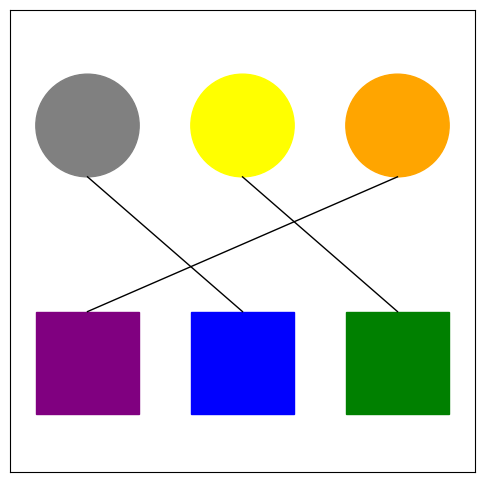

In [13]:
problemaa.visualizar(dicc) # visualizacion del problema

colores bombillas:

1. <span style="color:yellow">Amarillo</span> -> encendido
2. <span style="color:gray">Gris</span> -> apagado
3. <span style="color:orange">Naranja</span> -> caliente (se encendio y luego se apago)

colores interruptores:

1. <font color='#0993D0'>azul</font> -> apagado
2. <font color='#00FF00'>verde</font> -> encendido
3. <font color='#800080'>morado</font> -> encendido y luego apagado